# Вывод формул


## Обозначения

Цепное правило дифференцирования(используеься позднее при выоде формул):
Если имеем фунцию y(x), знаем $\nabla_yE$ и хотим найти $\nabla_xE$, при этом
 $\nabla_yE = (\frac{∂E}{∂y_1}, \frac{∂E}{∂y_2},..., \frac{∂E}{∂y_m})$,

то
$\nabla_xE=(\sum_i\frac{∂E}{∂y_i}\frac{∂y_i}{∂x_1}, \sum_i\frac{∂E}{∂y_i}\frac{∂y_i}{∂x_2},...,\sum_i\frac{∂E}{∂y_i}\frac{∂y_i}{∂x_n}) = (\frac{∂y}{∂x})^T * \nabla_yE$, где $\frac{∂y}{∂x}$ - Якобиан.

Выведем формулы для алгоритма обратного распространения ошибки.

Имеем входной, скрытый и выходной слои. На скрытом функция активации ReLU, на выходном Softmax. Целевая функция - кросс-энтропия.

Тогда:
* Входной слой: вектор x, d(w*h) нейронов, m пакетов(batch)
* Скрытый слой: n нейронов
  * $W^{(1)} \in R^{n \times d}$ - матрица весов
  * $b^{(1)} \in R^{n}$ - вектор смещений
* Выходной слой: K нейронов(по числу классов)
  * $W^{(2)} \in R^{K \times n}$ - матрица весов
  * $b^{(2)} \in R^{K}$ - вектор смещений

## Прямой проход

1.   * $z^{(1)} = W^{(1)}*x + b^{(1)}* \hat{1}_m^T$ - линейное преобразование, , $\hat{1}_m$ - единичный вектор-стобец из m единиц.
      * $a_{i,j}^{(1)} = ReLU(z_{i,j}^{(1)}) = max(0, z_{i,j}^{(1)}) $ - выход скрытого слоя.

2.   * $z^{(2)} = W^{(2)}*a^{(1)} + b^{(2)}* \hat{1}_m^T$ - линейное преобразование выхода предыдущего слоя, $\hat{1}_m$ - единичный вектор-стобец из m единиц.
      * $a_{i,j}^{(2)} = Softmax(z_{i,j}^{(2)}) = \frac{e^{z_{i,j}^{(2)}}}{\sum_{l}e^{z_{l,j}^{(2)}}} $ - выход.

3. E($z^{(2)}$) = $-\frac{1}{m}\sum_{i=1}^m\sum_{k = 1}^K y_{(k,i)} * ln(a_{k,i}^{(2)}) = -\frac{1}{m}\sum_{i=1}^m ln(a_{k',i}^{(2)})$ - кросс-энтропия от выхода последнего слоя, усредненная по батчам, где $y_k$ - компонента one-hot-encoding вектора, в котором нули на всех позициях, кроме той, что соответствует правильному классу(k').



## Обратное распространение



1. $\nabla_{a^{(2)}}E$ - матрица с m столбцами и k строками, где элементы имеют следующий вид:

    *   $\frac{∂E}{∂a_{k,i}^{(2)}}=0$, если k $\neq$ k'
   *    $\frac{∂E}{∂a_{k,i}^{(2)}}=-\frac{1}{m*a_{k,i}^{(2)}}$, если k = k'(класс верный)

2. $\nabla_{z^{(2)}}E = (\frac{∂a^{(2)}}{∂z^{(2)}})^T * \nabla_{a^{(2)}}E$ - матрица с m столбцами и k строками, где элементы якобиана для каждого из m столбцов имеют следующий общий вид:

    *   $\frac{∂a_{i}^{(2)}}{∂z_{j}^{(2)}}=\frac{∂\frac{e^{z_{i}^{(2)}}}{\sum_{j}e^{z_{j}^{(2)}}}}{∂z_{j}^{(2)}}=e^{z_{i}^{(2)}} * (-1) * (\frac{1}{\sum_j e^{z_j^{(2)}}})^2 * e^{z_j^{(2)}} = -a_i^{(2)} * a_j^{(2)}$, если i $\neq$ j
   *    $\frac{∂a_{i}^{(2)}}{∂z_{i}^{(2)}}= \frac{∂\frac{e^{z_{i}^{(2)}}}{\sum_{j}e^{z_{j}^{(2)}}}}{∂z_{i}^{(2)}}=e^{z_{i}^{(2)}} * \frac{1}{\sum_{j}e^{z_{j}^{(2)}}} + e^{z_{i}^{(2)}} * (-1) * (\frac{1}{\sum_j e^{z_j^{(2)}}})^2 *e^{z_{i}^{(2)}} = a_i^{(2)} - a_i^{(2)} * a_i^{(2)}$, если i = j

При умножении Якобиана на каждый из векторов градиента по $a^{(2)} $ получим что: $\nabla_{z^{(2)}}E = \frac{1}{m}(a^{(2)} - y)$

3. $\nabla_{b^{(2)}}E = (\frac{∂z^{(2)}}{∂b^{(2)}})^T * \nabla_{z^{(2)}}E =\sum_{i=1}^{m}(\nabla_{z^{(2)}}E)_i = \nabla_{z^{(2)}}E * 1_m$ - сумма элементов строки (т.к. Якобианы - единичные матрицы). Выразили через вектор единиц и градиент.

4. $\nabla_{W^{(2)}}E$ найдем применяя чуть другие формулы, это будет матрица с элементами вида $\frac{∂E}{∂w_{i,j}}$, где $w_{i,j}$ - веса из матрицы весов.

Для начала отметим, что $\frac{∂z_i^{(2)}}{∂w_{i,j}^{(2)}} = a_j^{(1)}$, поэтому $\frac{∂E}{∂w_{i,j}^{(2)}} = \sum_{u=1}^{M_2}\frac{∂E}{∂z_u^{(2)}}\frac{∂z_u^{(2)}}{∂w_{i, j}^{(2)}} = \frac{∂E}{∂z_i^{(2)}}\frac{∂z_i^{(2)}}{∂w_{i, j}^{(2)}}= \frac{∂E}{∂z_i^{(2)}} * a_j^{(1)}$, где $M_2$ - количество нейронов 2-го слоя.
Отсюда $\nabla_{W^{(2)}}E =  \nabla_{z^{(2)}}E * (a^{(1)}) ^ {T}$

5. $\nabla_{a^{(1)}}E = (\frac{∂z^{(2)}}{∂a^{(1)}})^T * \nabla_{z^{(2)}}E = W_2^T * \nabla_{z^{(2)}}E$

6. Производная от ReLU - 0, там где значение аргумента меньше или равно 0 и равна аргументу в остальных случаях, поэтому $\nabla_{z^{(1)}}E = (\frac{∂a^{(1)}}{∂z^{(1)}})^T * \nabla_{a^{(1)}}E = \nabla_{a^{(1)}}E (*) (Z1 > 0)$, где (*) - произведение Адамара(поэлементное),  (Z1 > 0) - матрица с единицами и нулями в зависимости от производной ReLU

7. $\nabla_{b^{(1)}}E = \nabla_{z^{(1)}}E * 1_m$ (по аналогии с пунктом 3)

8. $\nabla_{W^{(1)}}E =  \nabla_{z^{(1)}}E * (x) ^ {T}$ (по аналогии с пунктом 4)



## Формулы для корректировки весов

$W = W - α *  dW$,

$b = W - α *  db$,

где $α$ - learning rate

# Код реализации

## Демонстрация избранных изображений

In [390]:
!pip install idx2numpy

In [391]:
import numpy as np
import matplotlib.pyplot as plt
import time
import idx2numpy

In [392]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [393]:
X_train = idx2numpy.convert_from_file('/content/drive/MyDrive/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte')
X_test = idx2numpy.convert_from_file('/content/drive/MyDrive/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')

Y_train = idx2numpy.convert_from_file('/content/drive/MyDrive/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
Y_test = idx2numpy.convert_from_file('/content/drive/MyDrive/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

In [394]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Картинки

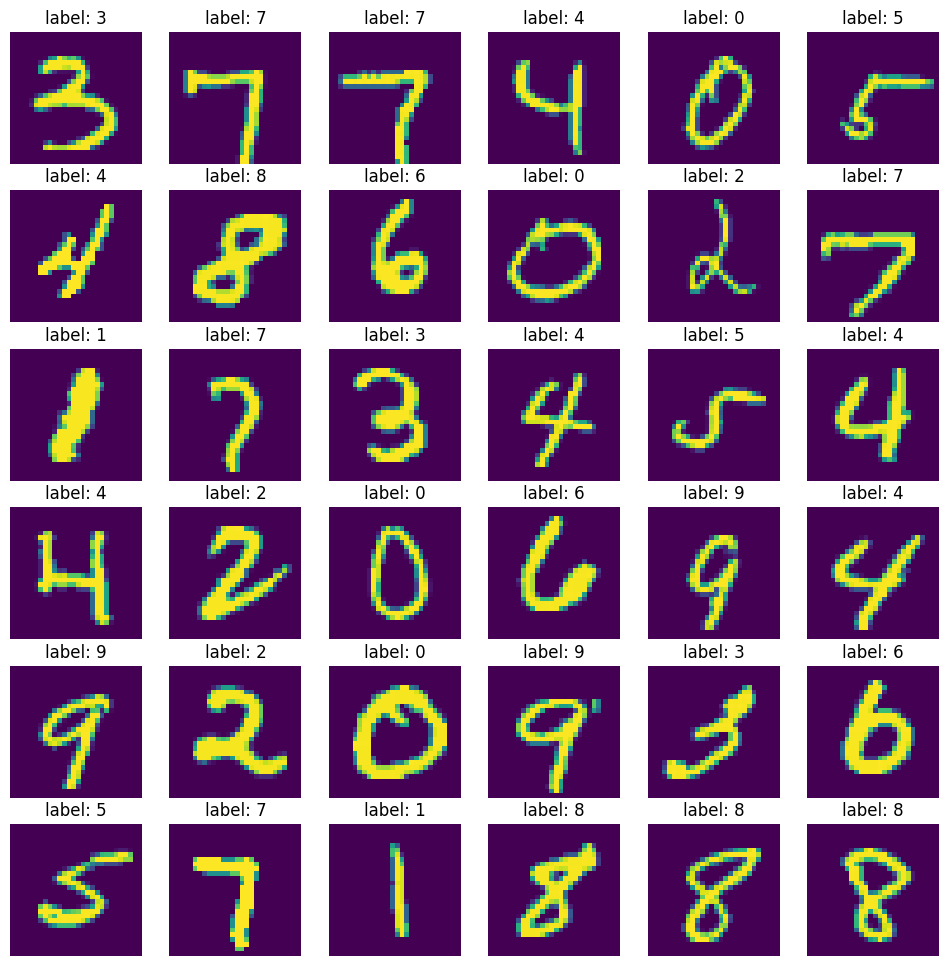

In [ ]:
rng = np.random.default_rng(seed=43)
perm_ind = np.arange(X_train.shape[0])
rng.shuffle(perm_ind)
X_train_rand = X_train[perm_ind]
Y_train_rand = Y_train[perm_ind]
fig, axes = plt.subplots(6, 6, figsize=(12,12))

for i in range(6):
    for j in range(6):
        ind = i * 6 + j
        axes[i, j].imshow(X_train_rand[ind])
        axes[i, j].set_title(f'label: {str(Y_train_rand[ind])}')
        axes[i, j].axis('off')
plt.show()

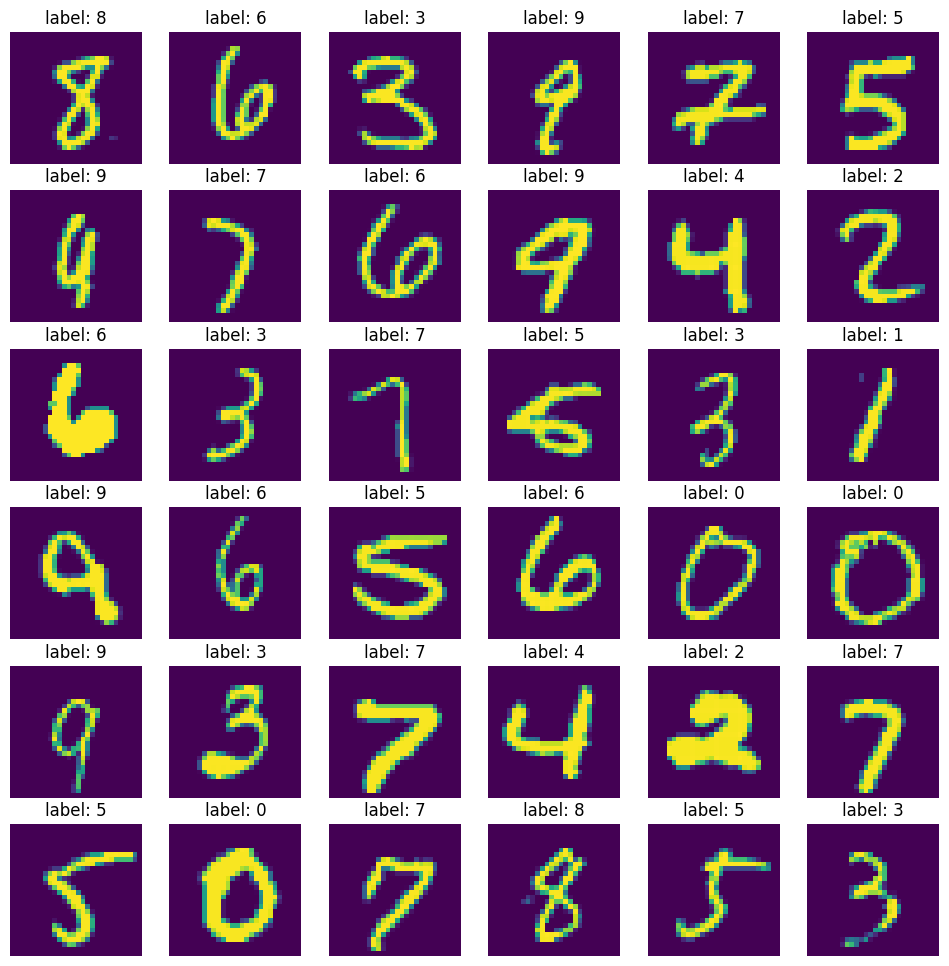

In [ ]:
rng = np.random.default_rng(seed=43)
perm_ind = np.arange(X_test.shape[0])
rng.shuffle(perm_ind)
X_test_rand = X_test[perm_ind]
Y_test_rand = Y_test[perm_ind]
fig, axes = plt.subplots(6, 6, figsize=(12,12))

for i in range(6):
    for j in range(6):
        ind = i * 6 + j
        axes[i, j].imshow(X_test_rand[ind])
        axes[i, j].set_title(f'label: {str(Y_test_rand[ind])}')
        axes[i, j].axis('off')
plt.show()

## Обучение

Основные параметры:

In [395]:
img_size = 28 * 28
batch_size = 60 #может быть от 8 до 64
lr = 0.1
s = 300 #кол-во нейронов скрытого слоя
epochs = 20
num_classes = 10

Предобработка:

In [396]:
X_train = X_train.reshape((60000, img_size))
X_test = X_test.reshape((10000, img_size))

In [397]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [398]:
Y_train = np.eye(10)[Y_train]
Y_test = np.eye(10)[Y_test]

Инициализация весов и смещений:

In [399]:
def he_initialize(n, d):
    rng = np.random.default_rng()
    return rng.normal(loc=0, scale=np.sqrt(2/d), size=(n, d))

In [400]:
W1 = he_initialize(s, img_size)
b1 = np.zeros((s, 1))

W2 = he_initialize(num_classes, s)
b2 = np.zeros((num_classes, 1))

In [401]:
ones_m = np.ones((batch_size, 1))

Функции, применяемые при обучении:

In [402]:
def ReLU(x):
    return np.maximum(0, x)

In [403]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis = 0, keepdims = True))
    return exp_x / np.sum(exp_x, axis = 0, keepdims = True)

In [404]:
def ReLU_der(x):
    return np.where(x<=0, 0, 1)

Функция для прямого прохода:

In [405]:
def forward(x, w1, B1, w2, B2, ones_m_t):
    z1 = w1 @ x + B1 @ ones_m_t.T
    a1 = ReLU(z1)

    z2 = w2 @ a1 + B2 @ ones_m_t.T
    y_pred = softmax(z2)

    return  z1, a1, z2, y_pred

Функция для обратного прохода:

In [406]:
def backward(x, y_pred, y_true, w2, Z1, A1, batch_size_t, ones_m_t):
    dz2 = (1/batch_size_t) * (y_pred - y_true)
    dW2 = dz2 @ A1.T
    db2 = dz2 @ ones_m_t

    da1 = w2.T @ dz2
    dz1 = da1 * ReLU_der(Z1)
    dW1 = dz1 @ x.T
    db1 = dz1 @ ones_m_t

    return dW1, db1, dW2, db2

Стохастический градиентный спуск:

In [407]:
def SGD(m, dm, lr):
    return m - lr * dm

Обучение:

In [408]:
for epoch in range(epochs):
    start = time.time()
    perm_ind = np.arange(X_train.shape[0])
    np.random.shuffle(perm_ind)
    X_train = X_train[perm_ind]
    Y_train = Y_train[perm_ind]
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i: i + batch_size].T
        Y_batch = Y_train[i: i + batch_size].T
        z1, a1, z2, y_pred = forward(X_batch, W1, b1, W2, b2, ones_m)
        dW1, db1, dW2, db2 = backward(X_batch, y_pred, Y_batch, W2, z1, a1, batch_size, ones_m)
        W1 = SGD(W1, dW1, lr)
        b1 = SGD(b1, db1, lr)
        W2 = SGD(W2, dW2, lr)
        b2 = SGD(b2, db2, lr)

    ones = np.ones((X_train.shape[0], 1))
    _, _, _, y_pred = forward(X_train.T, W1, b1, W2, b2, ones)
    acc = np.mean(np.argmax(y_pred, axis = 0) == np.argmax(Y_train, axis = 1))

    stop = time.time()
    duration = stop - start
    print(f'Epoch: {epoch + 1}. Accuracy: {acc}. Time: {duration}.')

Epoch: 1. Accuracy: 0.9421. Time: 14.040881156921387.
Epoch: 2. Accuracy: 0.96045. Time: 6.9548211097717285.
Epoch: 3. Accuracy: 0.9691833333333333. Time: 9.53424596786499.
Epoch: 4. Accuracy: 0.9746333333333334. Time: 6.1875998973846436.
Epoch: 5. Accuracy: 0.9794333333333334. Time: 9.193310976028442.
Epoch: 6. Accuracy: 0.9836833333333334. Time: 6.227385520935059.
Epoch: 7. Accuracy: 0.98555. Time: 8.886918783187866.
Epoch: 8. Accuracy: 0.9876333333333334. Time: 6.262908220291138.
Epoch: 9. Accuracy: 0.9899. Time: 8.97579312324524.
Epoch: 10. Accuracy: 0.9891. Time: 6.2212958335876465.
Epoch: 11. Accuracy: 0.9917666666666667. Time: 9.452338695526123.
Epoch: 12. Accuracy: 0.9930833333333333. Time: 6.665550470352173.
Epoch: 13. Accuracy: 0.99345. Time: 8.442993879318237.
Epoch: 14. Accuracy: 0.99505. Time: 6.993791103363037.
Epoch: 15. Accuracy: 0.9957833333333334. Time: 8.06340503692627.
Epoch: 16. Accuracy: 0.9961333333333333. Time: 6.857381105422974.
Epoch: 17. Accuracy: 0.996683333

Проверка на тестовой выборке:

In [409]:
ones = np.ones((X_test.shape[0], 1))
_, _, _,y_pred_test = forward(X_test.T, W1, b1, W2, b2, ones)

acc = np.mean(np.argmax(y_pred_test, axis = 0) == np.argmax(Y_test, axis = 1))
print(f'Accuracy: {acc}.')

Accuracy: 0.9802.


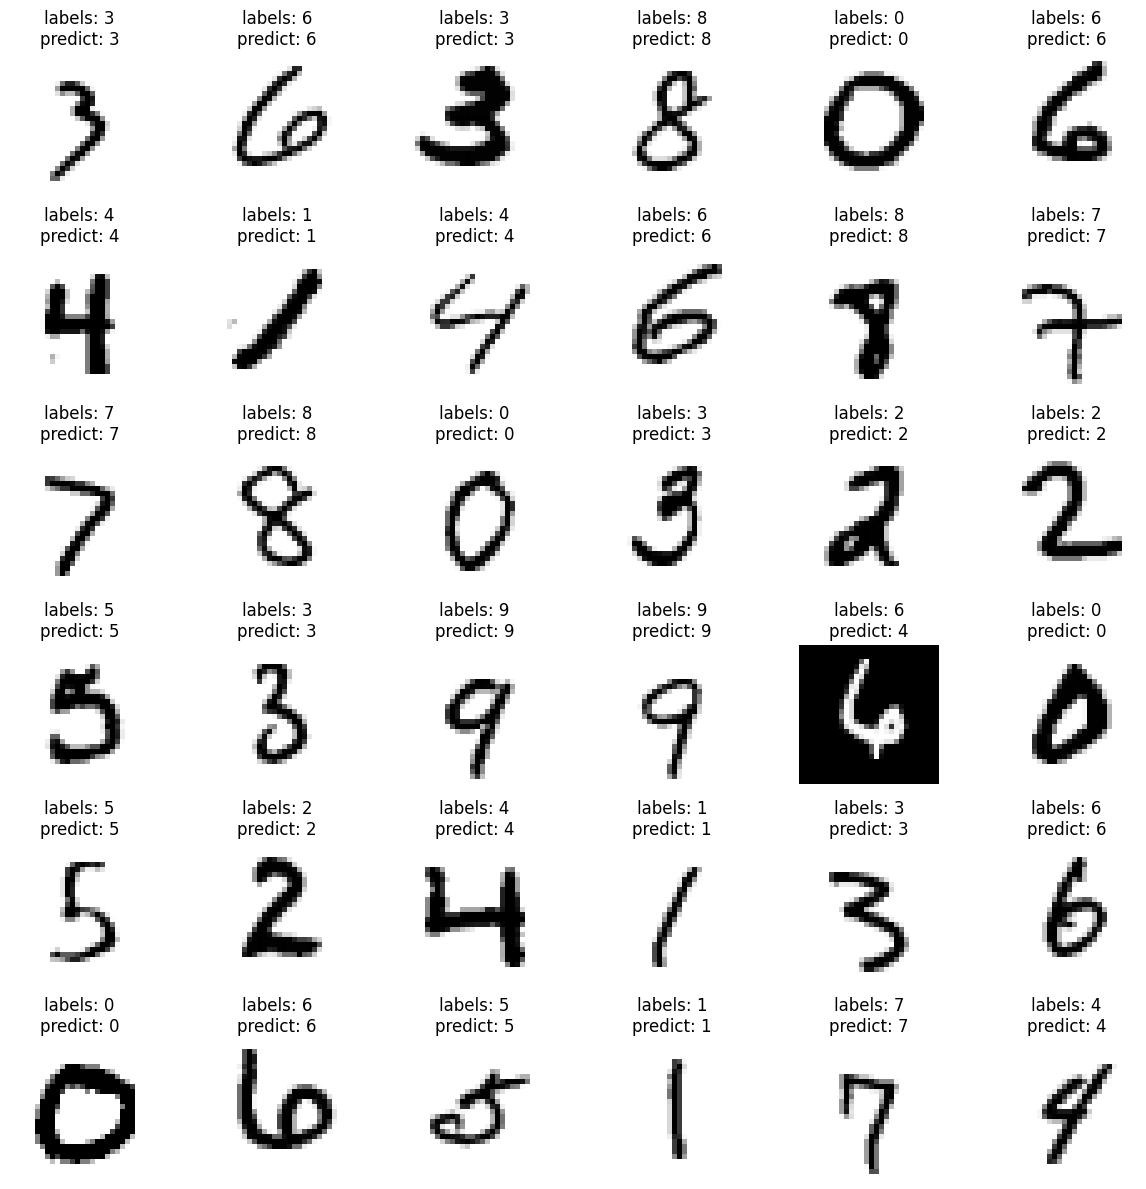

In [410]:
rng = np.random.default_rng(seed=66)
perm_ind = np.arange(X_test.shape[0])
rng.shuffle(perm_ind)
X_data = X_test[perm_ind]
Y_data = np.argmax(Y_test[perm_ind], axis=1)
ones = np.ones((X_test.shape[0], 1))
_, _, _,y_pred_test = forward(X_data.T, W1, b1, W2, b2, ones)
y_pred_test = np.argmax(y_pred_test, axis = 0)

fig, axes = plt.subplots(6, 6, figsize=(12, 12))
for i in range(6):
    for j in range(6):
        index = i * 6 + j
        if Y_data[index] == y_pred_test[index]:
            cmap = plt.cm.binary
        else:
            cmap = plt.cm.gray
        axes[i, j].imshow(X_data[index].reshape(28, 28), cmap=cmap)
        axes[i, j].axis('off')
        labels_str = 'labels: ' + str(Y_data[index]) + '\n' + 'predict: ' + str(y_pred_test[index])
        axes[i, j].set_title(labels_str)
plt.tight_layout()
plt.show()